<a href="https://colab.research.google.com/github/iamabd53/airbnb-booking-capston-project/blob/main/Airbnb_1_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###Import Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA material/Airbnb NYC 2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Understanding the column of the DataFrame

 Columns of the DataFrame

* **Id-** It is listing id. Whenever a host list its property on Airbnb, a unique id is created, since every id is unique there are 458895 unique id.
As per my observation ,every listing is a listing of unique properties.(means the same property is not listed more than 1)
* **name-** It is the property description. Two properties can have the same name, but they are not the same property, every property in the data are unique, as all of them are having different longitude and latitude, that means every properties are situated in different location. 
* **host_id-** Its the identity id given to individual host (For example- two different host cant have the same host_id). So if we want to count the number of host, we count the unique host_id.
* **neighbourhood_group-** This are the 5 Boroughs of New York city, in which the property is located.
* **neighbourhood-**  This are the towns and villages in New York
* **room_type-** Types of properties 
* **price-**  Property price per day
* **minimum_nights-** It is the minimum number of night you can book a property,( example-1 year rental contract)
* **number_of_reviews-** Total number of reviews 
* **Calculated_host_listing_count-** The number of times the host has listed their property.
* **availabilitty_365-** the number of days the property were available for booking.

In [ ]:
df.head(5)

### DATA CLEANING  

In [ ]:
# removing null values from name
df.loc[df.name.isna(),'name'] = df.loc[df.name.isna(),'name'].apply(lambda x : 'no_description')

In [ ]:
# removing null values from host name
df.loc[df.host_name.isna(),'host_name'] = df.loc[df.host_name.isna(),'host_name'].apply(lambda x : 'no_name')

In [ ]:
# droping the column of last review
df.drop(columns= 'last_review', inplace = True)

In [ ]:
# changing the value of NaN to 0 of column in reviews_per_month
df.loc[df.reviews_per_month.isna(),'reviews_per_month'] = df.loc[df.reviews_per_month.isna(),'reviews_per_month'].apply(lambda x : 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
df.groupby('host_id')

In [ ]:
#Considering 3 column of the dataframe df
df1=df[['neighbourhood_group','room_type','price']]

#Create dataframe df2 containig price greater than zero
df2=df1[df1.price!=0]

# groupby neighbourhood_group and room_type, And find there average price 
df3=df2.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
df3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
# Creat function to extract average price from dataframe df3
def fun(neighbourhood_group,room_type):
 avg_price=df3.loc[neighbourhood_group,room_type]
 return avg_price

In [ ]:
# Repllace 0 price by the average price from the dataframe df3
df['price']=df.apply(lambda x: fun(x['neighbourhood_group'],x['room_type'])  if x['price']==0 else x['price'], axis=1 )

## **EXPLORATORY DATA ANALYSIS**

### Calculating host listing count of different room types in different neighbourhood group

In [ ]:
df.groupby(['room_type'])['calculated_host_listings_count'].count().reset_index()
df.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count'].count().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


### Total reviews of properity in different neighbourhood group

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


### Properties location on map and the percentage of each property type listed on Airbnb

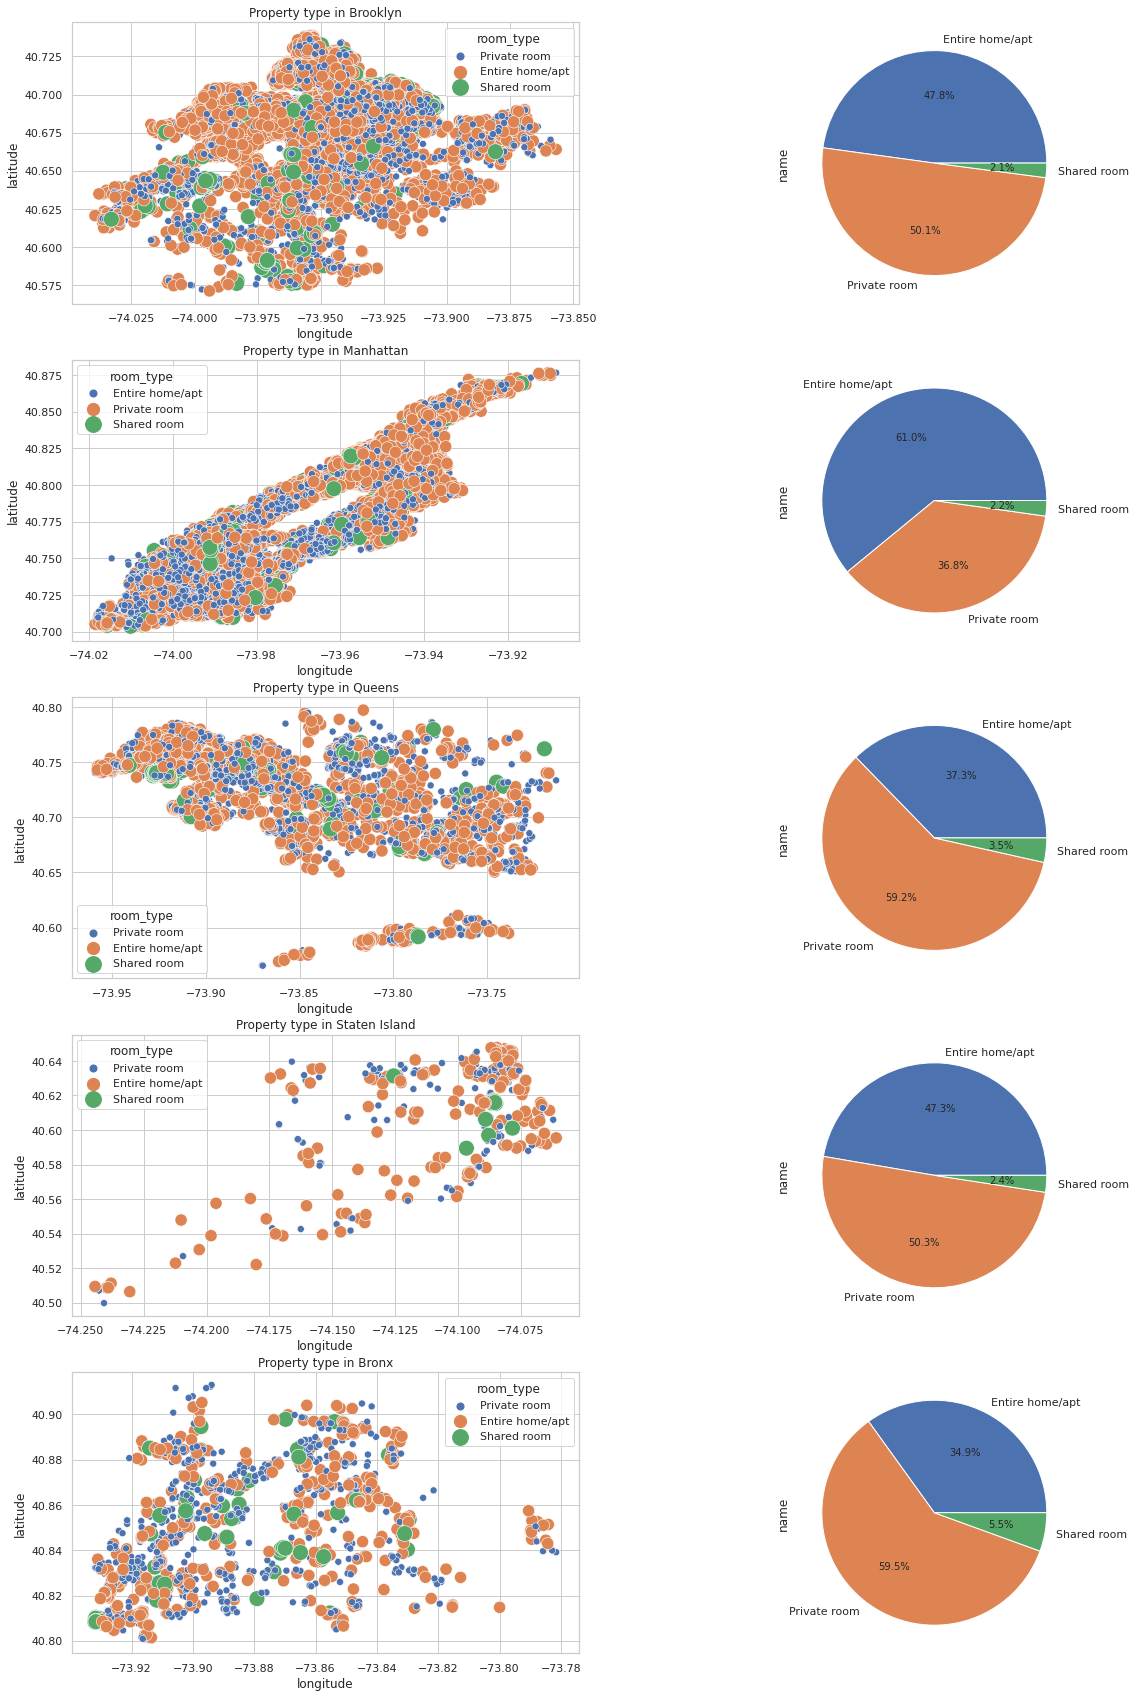

In [ ]:
i=1
plt.figure(figsize=(20,30))
for city in ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']:
  df1=df[df.neighbourhood_group==city].groupby(['room_type'])['name'].nunique()
  df2=df[df.neighbourhood_group==city]

  plt.subplot(5,2,i)
  sns.scatterplot(y=df2.latitude,x=df2.longitude,hue=df2.room_type, size=df2.room_type, sizes=(250,50)).set(title=f'Property type in {city}')
  plt.subplot(5,2,i+1)
  df1.plot.pie(autopct="%.1f%%")
  i=i+2

###  Average price of property in different neighbourhood group 

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444
